# 1.Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load the data
data = pd.read_csv("train.tsv", delimiter = '\t', quoting = 3)
print(f"Dataset shape : {data.shape}")

Dataset shape : (3150, 5)


In [3]:
data.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [4]:
data.columns.values

array(['rating', 'date', 'variation', 'verified_reviews', 'feedback'],
      dtype=object)

In [5]:
data.isnull().sum()

rating              0
date                0
variation           0
verified_reviews    1
feedback            0
dtype: int64

In [6]:
data[data['verified_reviews'].isna() == True]

,rating,date,variation,verified_reviews,feedback
473,2,29-Jun-18,White,NaN,0


In [7]:
data.dropna(inplace=True)

In [8]:
data.shape

(3149, 5)

# 2.Exploratory Data Analysis

In [9]:
data['length'] = data['verified_reviews'].apply(len)

In [10]:
data.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"""Sometimes while playing a game, you can answe...",1,197
3,5,31-Jul-18,Charcoal Fabric,"""I have had a lot of fun with this thing. My 4...",1,174
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


In [11]:
print(data.iloc[10]['verified_reviews'])
print(len(data.iloc[10]['verified_reviews']))
print(data.iloc[10]['length'])

"I sent it to my 85 year old Dad, and he talks to it constantly."
65
65


In [12]:
data.dtypes

rating               int64
date                object
variation           object
verified_reviews    object
feedback             int64
length               int64
dtype: object

In [13]:
len(data)

3149

In [14]:
data['rating'].value_counts()

rating
5    2286
4     455
1     161
3     152
2      95
Name: count, dtype: int64

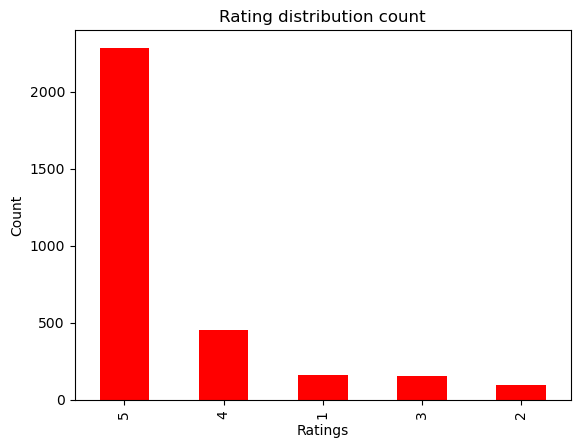

In [15]:
data['rating'].value_counts().plot.bar(color = 'red')
plt.title('Rating distribution count')
plt.xlabel('Ratings')
plt.ylabel('Count')
plt.show()

In [16]:
round(data['rating'].value_counts()/data.shape[0]*100,2)

rating
5    72.59
4    14.45
1     5.11
3     4.83
2     3.02
Name: count, dtype: float64

<Axes: ylabel='Percentage wise distrubution of rating'>

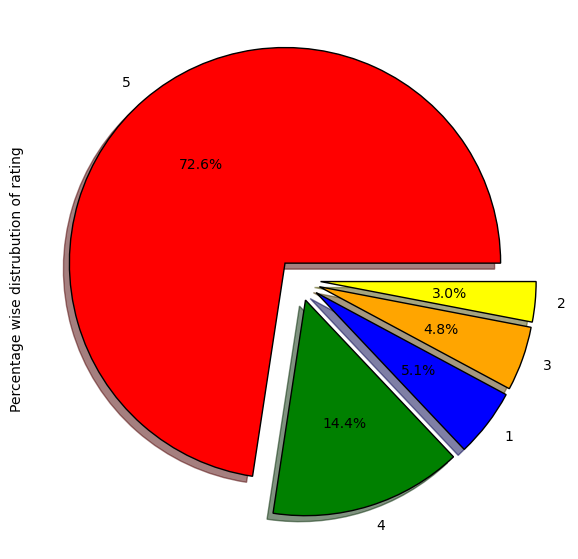

In [17]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green', 'blue','orange','yellow')
wp = {'linewidth':1, "edgecolor":'black'}
ratings = data['rating'].value_counts()/data.shape[0]
explode=(0.1,0.1,0.1,0.1,0.1)
ratings.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors,wedgeprops=wp, explode=explode, label='Percentage wise distrubution of rating')

In [18]:
data['feedback'].value_counts()

feedback
1    2893
0     256
Name: count, dtype: int64

In [19]:
review_0 = data[data['feedback'] == 0].iloc[1]['verified_reviews']
print(review_0)

Sound is terrible if u want good music too get a bose


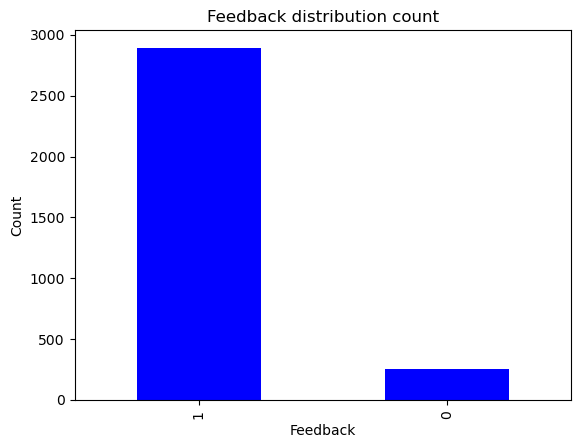

In [20]:
data['feedback'].value_counts().plot.bar(color = 'blue')
plt.title('Feedback distribution count')
plt.xlabel('Feedback')
plt.ylabel('Count')
plt.show()

In [21]:
round(data['feedback'].value_counts()/data.shape[0]*100,2)

feedback
1    91.87
0     8.13
Name: count, dtype: float64

<Axes: ylabel='Percentage wise distrubution of feedback'>

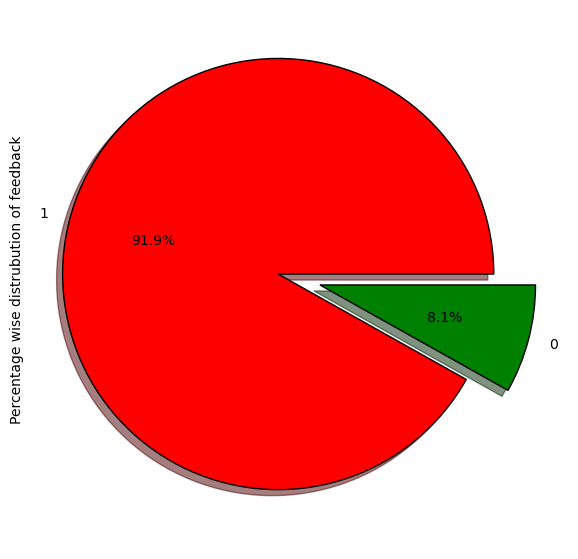

In [22]:
fig = plt.figure(figsize=(7,7))
colors = ('red', 'green')
wp = {'linewidth':1, "edgecolor":'black'}
tags = data['feedback'].value_counts()/data.shape[0]
explode=(0.1,0.1)
tags.plot(kind='pie', autopct="%1.1f%%", shadow=True, colors=colors, wedgeprops=wp, explode=explode, label='Percentage wise distrubution of feedback')

In [23]:
data[data['feedback'] == 0]['rating'].value_counts()

rating
1    161
2     95
Name: count, dtype: int64

In [24]:
data[data['feedback'] == 1]['rating'].value_counts()

rating
5    2286
4     455
3     152
Name: count, dtype: int64

In [25]:
data['variation'].value_counts()

variation
Black  Dot                      516
Charcoal Fabric                 430
Configuration: Fire TV Stick    350
Black  Plus                     270
Black  Show                     265
Black                           261
Black  Spot                     241
White  Dot                      184
Heather Gray Fabric             157
White  Spot                     109
Sandstone Fabric                 90
White                            90
White  Show                      85
White  Plus                      78
Oak Finish                       14
Walnut Finish                     9
Name: count, dtype: int64

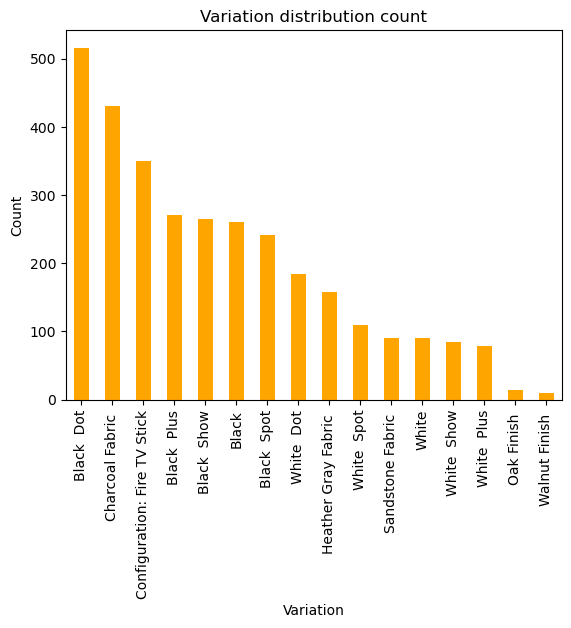

In [26]:
data['variation'].value_counts().plot.bar(color = 'orange')
plt.title('Variation distribution count')
plt.xlabel('Variation')
plt.ylabel('Count')
plt.show()

In [27]:
round(data['variation'].value_counts()/data.shape[0]*100,2)

variation
Black  Dot                      16.39
Charcoal Fabric                 13.66
Configuration: Fire TV Stick    11.11
Black  Plus                      8.57
Black  Show                      8.42
Black                            8.29
Black  Spot                      7.65
White  Dot                       5.84
Heather Gray Fabric              4.99
White  Spot                      3.46
Sandstone Fabric                 2.86
White                            2.86
White  Show                      2.70
White  Plus                      2.48
Oak Finish                       0.44
Walnut Finish                    0.29
Name: count, dtype: float64

In [28]:
data.groupby('variation')['rating'].mean()

variation
Black                           4.233716
Black  Dot                      4.453488
Black  Plus                     4.370370
Black  Show                     4.490566
Black  Spot                     4.311203
Charcoal Fabric                 4.730233
Configuration: Fire TV Stick    4.591429
Heather Gray Fabric             4.694268
Oak Finish                      4.857143
Sandstone Fabric                4.355556
Walnut Finish                   4.888889
White                           4.166667
White  Dot                      4.423913
White  Plus                     4.358974
White  Show                     4.282353
White  Spot                     4.311927
Name: rating, dtype: float64

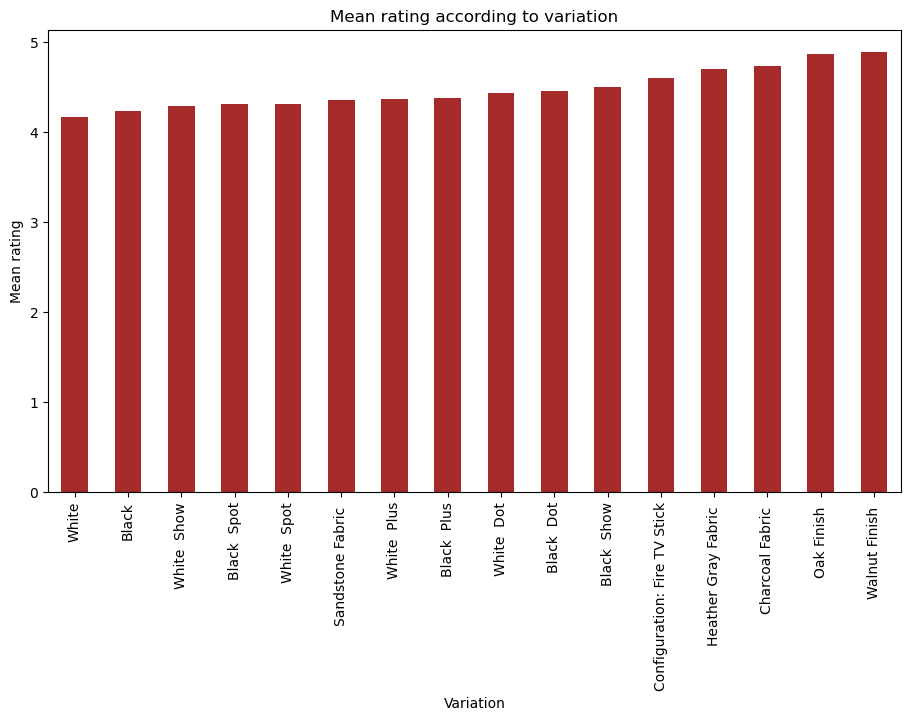

In [29]:
data.groupby('variation')['rating'].mean().sort_values().plot.bar(color = 'brown', figsize=(11, 6))
plt.title("Mean rating according to variation")
plt.xlabel('Variation')
plt.ylabel('Mean rating')
plt.show()

In [30]:
data['length'].describe()

count    3149.000000
mean      132.714513
std       182.541531
min         1.000000
25%        30.000000
50%        74.000000
75%       166.000000
max      2853.000000
Name: length, dtype: float64

[Text(0.5, 1.0, 'Distribution of length of review ')]

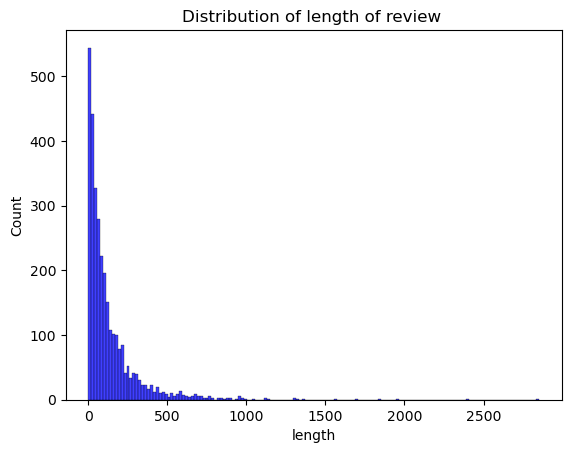

In [31]:
sns.histplot(data['length'],color='blue').set(title='Distribution of length of review ')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 0')]

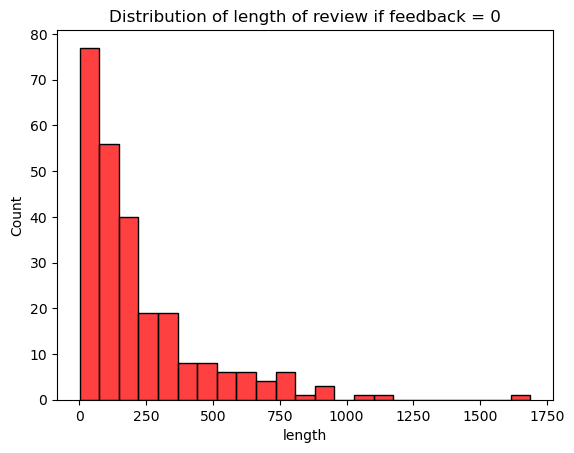

In [32]:
sns.histplot(data[data['feedback']==0]['length'],color='red').set(title='Distribution of length of review if feedback = 0')

[Text(0.5, 1.0, 'Distribution of length of review if feedback = 1')]

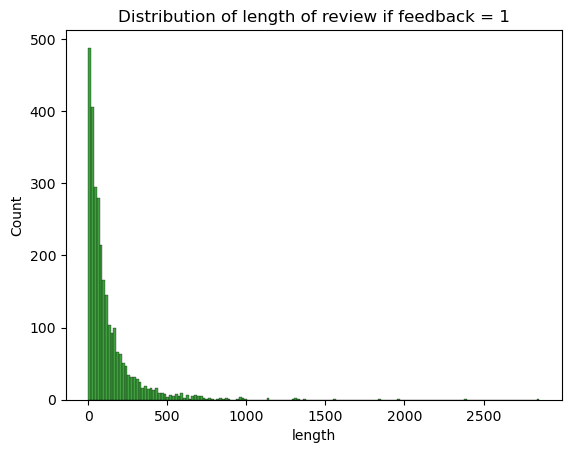

In [33]:
sns.histplot(data[data['feedback']==1]['length'],color='green').set(title='Distribution of length of review if feedback = 1')

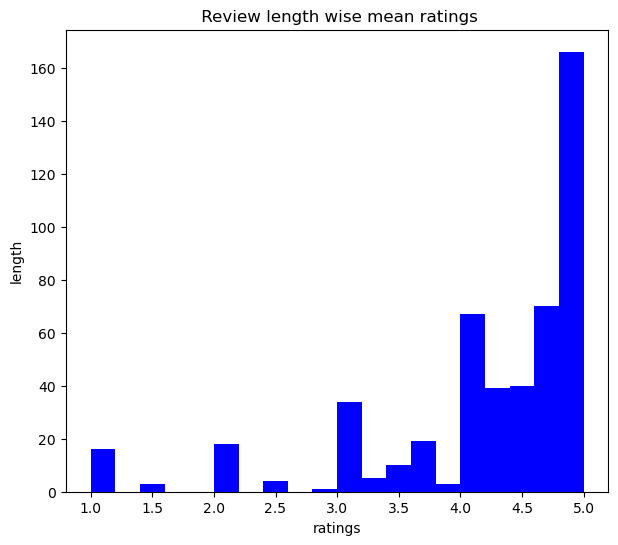

In [34]:
data.groupby('length')['rating'].mean().plot.hist(color = 'blue', figsize=(7, 6), bins = 20)
plt.title(" Review length wise mean ratings")
plt.xlabel('ratings')
plt.ylabel('length')
plt.show()

In [35]:
from wordcloud import WordCloud

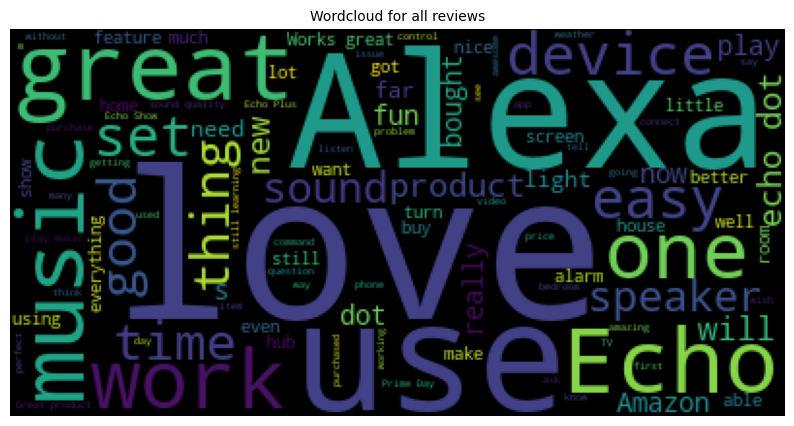

In [36]:
reviews = " ".join([review for review in data['verified_reviews']])
wc = WordCloud(background_color='black', max_words=100)
plt.figure(figsize=(10,10))
plt.imshow(wc.generate(reviews))
plt.title('Wordcloud for all reviews', fontsize=10)
plt.axis('off')
plt.show()

In [37]:
neg_reviews = " ".join([review for review in data[data['feedback'] == 0]['verified_reviews']])
neg_reviews = neg_reviews.lower().split()

pos_reviews = " ".join([review for review in data[data['feedback'] == 1]['verified_reviews']])
pos_reviews = pos_reviews.lower().split()


unique_negative = [x for x in neg_reviews if x not in pos_reviews]
unique_negative = " ".join(unique_negative)

unique_positive = [x for x in pos_reviews if x not in neg_reviews]
unique_positive = " ".join(unique_positive)


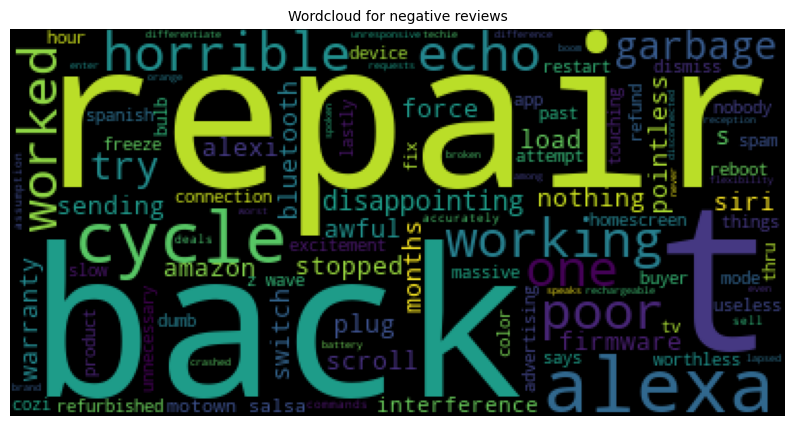

In [38]:
wc = WordCloud(background_color='black', max_words=100)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_negative))
plt.title('Wordcloud for negative reviews', fontsize=10)
plt.axis('off')
plt.show()

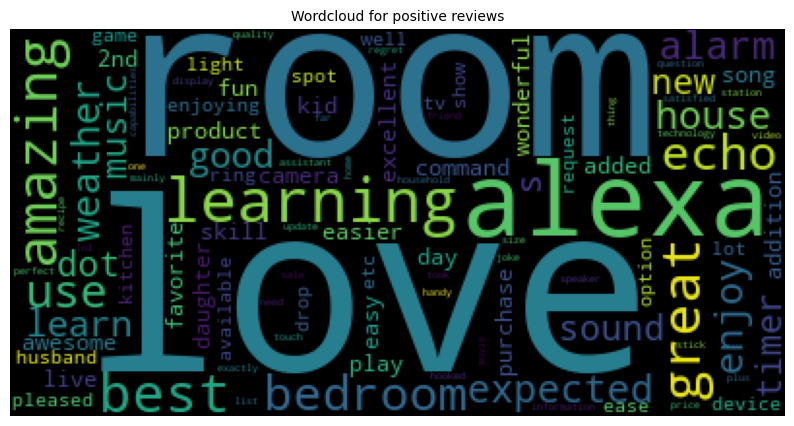

In [39]:
wc = WordCloud(background_color='black', max_words=100)

plt.figure(figsize=(10,10))
plt.imshow(wc.generate(unique_positive))
plt.title('Wordcloud for positive reviews', fontsize=10)
plt.axis('off')
plt.show()

# 3. Data Preprocessing

In [40]:
from nltk.stem.porter import PorterStemmer
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
import re

[nltk_data] Downloading package stopwords to C:\Users\Manish
[nltk_data]     Kumar\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [41]:
cv = CountVectorizer(stop_words='english')
words = cv.fit_transform(data.verified_reviews)
STOPWORDS = set(stopwords.words('english'))

In [42]:
corpus = []
stemmer = PorterStemmer()
for i in range(0, data.shape[0]):
  review = re.sub('[^a-zA-Z]', ' ', data.iloc[i]['verified_reviews'])
  review = review.lower().split()
  review = [stemmer.stem(word) for word in review if not word in STOPWORDS]
  review = ' '.join(review)
  corpus.append(review)

In [43]:
cv = CountVectorizer(max_features = 2500)
X = cv.fit_transform(corpus).toarray()
y = data['feedback'].values

In [44]:
X[0]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [45]:
X.shape,y.shape

((3149, 2500), (3149,))

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((2204, 2500), (2204,), (945, 2500), (945,))

In [48]:
scaler = MinMaxScaler()
X_train= scaler.fit_transform(X_train)
X_test= scaler.transform(X_test)


In [76]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((2204, 2500), (945, 2500), (2204,), (945,))

# 4.Modelling

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

In [50]:
model_rf = RandomForestClassifier()
model_rf.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
y_preds = model_rf.predict(X_test)

In [52]:
cm = confusion_matrix(y_test, y_preds)

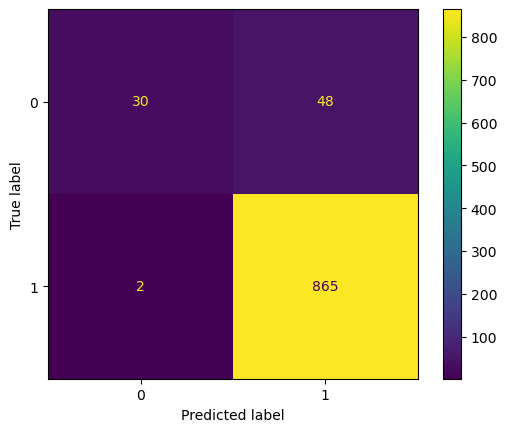

In [53]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_rf.classes_)
cm_display.plot()
plt.show()

In [54]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [55]:
y_preds1 = model_xgb.predict(X_test)

In [56]:
cm = confusion_matrix(y_test, y_preds1)
print(cm)

[[ 30  48]
 [  7 860]]


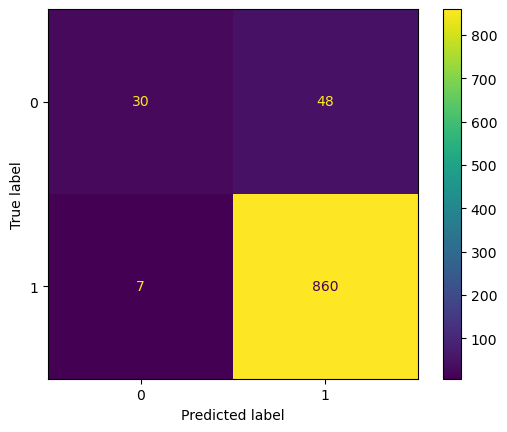

In [57]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_xgb.classes_)
cm_display.plot()
plt.show()

In [58]:
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [59]:
y_preds2 = model_dt.predict(X_test)

In [60]:
cm = confusion_matrix(y_test, y_preds2)
print(cm)

[[ 42  36]
 [ 43 824]]


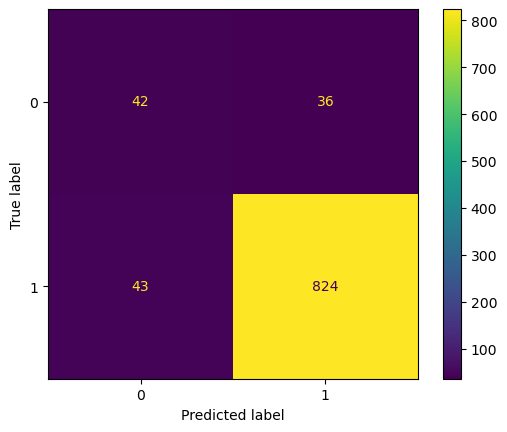

In [61]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [62]:
from sklearn.ensemble import BaggingClassifier
model_bag=BaggingClassifier()
model_bag.fit(X_train,y_train)

BaggingClassifier()

In [63]:
y_preds3 = model_bag.predict(X_test)
cm = confusion_matrix(y_test, y_preds3)
print(cm)

[[ 44  34]
 [ 30 837]]


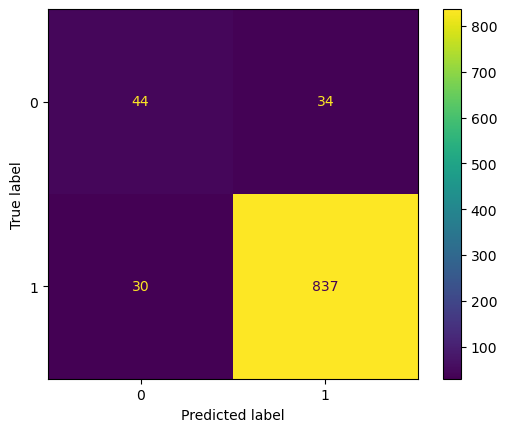

In [64]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
model_ext=ExtraTreesClassifier()
model_ext.fit(X_train,y_train)

ExtraTreesClassifier()

In [66]:
y_preds4 = model_ext.predict(X_test)
cm = confusion_matrix(y_test, y_preds4)
print(cm)

[[ 39  39]
 [ 20 847]]


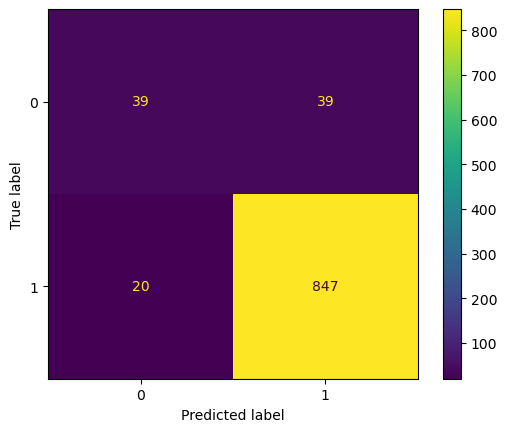

In [67]:
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model_dt.classes_)
cm_display.plot()
plt.show()

# 5.Performance Analysis

In [68]:
df_plot=[]
df_plot=pd.DataFrame(df_plot)

In [69]:
df_plot['actual_value']=y_test
df_plot['rf_classifier']=y_preds
df_plot['xgb_classifier']=y_preds1
df_plot['Decision_tree']=y_preds2
df_plot['Bagging']=y_preds3
df_plot['Extra_tree']=y_preds4

In [70]:
df_plot

,actual_value,rf_classifier,xgb_classifier,Decision_tree,Bagging,Extra_tree
0,1,1,1,1,1,1
1,1,1,1,1,1,1
2,0,1,1,1,1,1
3,1,1,1,1,1,1
4,1,1,1,1,1,1
...,...,...,...,...,...,...
940,1,1,1,1,1,1
941,1,1,1,1,1,1
942,1,1,1,1,1,1
943,1,1,1,1,1,1


<Axes: >

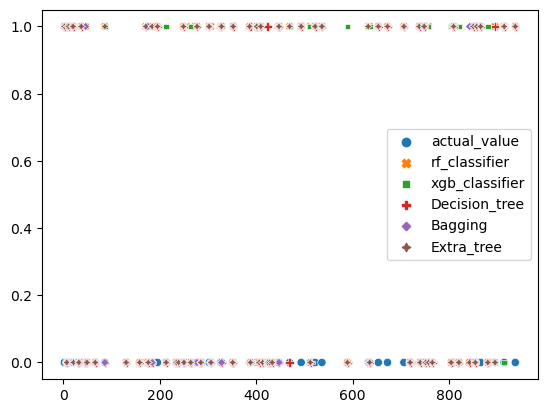

In [71]:
sns.scatterplot(df_plot[df_plot['actual_value']==0])

<Axes: >

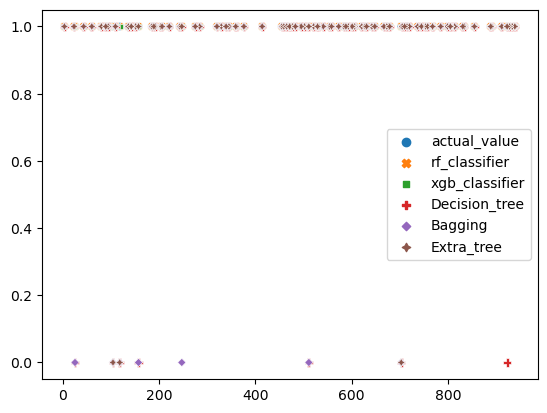

In [72]:
sns.scatterplot(df_plot[df_plot['actual_value']==1].sample(100))

<Axes: xlabel='Extra_tree', ylabel='Percent'>

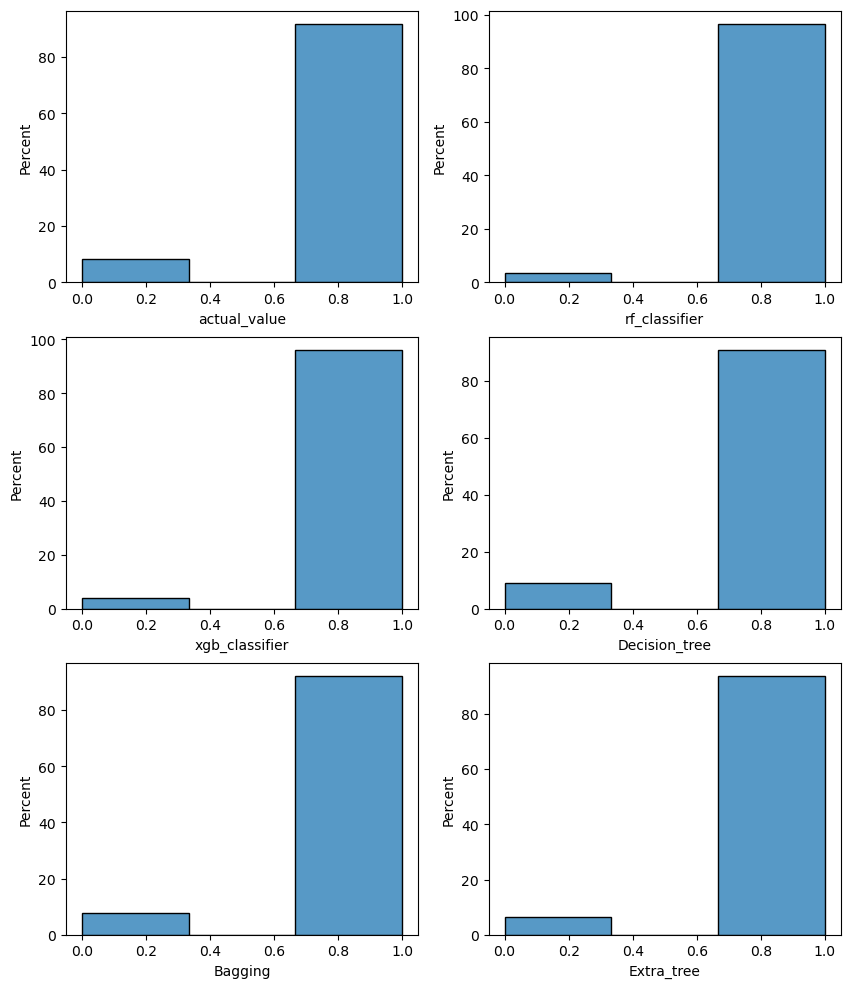

In [73]:
fig,axes=plt.subplots(nrows=3,ncols=2,figsize=(10,12))
sns.histplot(df_plot['actual_value'],stat="percent",ax=axes[0][0],bins=3)
sns.histplot(df_plot['rf_classifier'],stat="percent",ax=axes[0][1],bins=3)
sns.histplot(df_plot['xgb_classifier'],stat="percent",ax=axes[1][0],bins=3)
sns.histplot(df_plot['Decision_tree'],stat="percent",ax=axes[1][1],bins=3)
sns.histplot(df_plot['Bagging'],stat="percent",ax=axes[2][0],bins=3)
sns.histplot(df_plot['Extra_tree'],stat="percent",ax=axes[2][1],bins=3)